# Type-token ratio

As was discussed in one of the previous notebooks, the individual words that are found in a text are referred to as “tokens”, and the unique words are called “types”. Frequency lists count occurrences of types. 

The ratio between the number of types and the number of tokens can, under certain conditions, offer useful information about texts as well. The type-token ratio is calculated by dividing the number of types by the number of tokens. This division obviously results a number in between 0 and 1. This number gives an indication of the lexical diversity: the capacity of the author to vary the vocabulary. 

If the type-token ratio is high, this indicates that the author uses many unique words and that the text contains very little lexical repetition. If, by contrast, the type-token ratio is low, this implies that the same words recur frequently, and that there is a low level of lexical diversity. 

The code below demonstrates how the type-token ratio may be calculated, using the `word_tokenise()` function from the `tdm` module that was developed for this tutorial.   

In [1]:
from os.path import join
import re
import tdm


dir = 'Corpus'
text = 'ARoomWithAView.txt'
path = join( dir, text )

with open( path , encoding = 'utf-8' ) as file:
    full_text = file.read()

words = tdm.word_tokenise(full_text)

tokens = len(words)
unique_words = set(words)
types = len(unique_words)

ttr = types / tokens

print( f'Types: {types}' )
print( f'Tokens: {tokens}' )
print( f'Type-token ratio: {ttr}' )

Types: 7554
Tokens: 66445
Type-token ratio: 0.11368801264203476


The code above makes use of the function `set()`. It can be used to convert a list into a set. A set is default data structure in Python, which is very similar to a list. An important difference, however, is that, while a list may contain the same item multiple times, a set can only contain unique items. A list also stores the items in a specific order, while a set is **un**ordered. The `set()` function can be used very effectively to deduplicate a Python list.

The code that is given above can also be applied to all the texts in a corpus. This may enable us to compare the lexical diversity of all the texts that are studied. 

The code below defines a function named `ttr()` with takes a reference to a text as a parameter. It opens the file, accesses the full text and calculates the type-token ratio using the same code that was explained above. 

In [2]:
import os
import re
from os.path import join
import tdm

def removeExtension(text):
    new_text = re.sub( '\.txt' , '' , text )
    return new_text
    

def ttr(full_text):

    words = tdm.word_tokenise(full_text)
    
    for w in words: 
        if not( re.search( r'\w' , w )):
            words.remove(w)

    tokens = len(words)
    unique_words = set(words)
    types = len(unique_words)

    return types / tokens
    
    
dir = 'Corpus'    
for text in os.listdir(dir):
    if re.search( r'\.txt' , text ):
        path = join( dir , text) 
        with open( path , encoding = 'utf-8' ) as file:
            full_text = file.read()
            full_text = full_text.lower()
        
        print( f'{ removeExtension(text) }: {ttr(full_text)} ' )


SonsandLovers: 0.06765433332500562 
Ivanhoe: 0.083778395946741 
TheHappyPrince: 0.25996533795493937 
ThroughtheLookingGlass: 0.10868147334454704 
HeartofDarkness: 0.15930441207515306 
MobyDick: 0.09500203015967441 
ARoomWithaView: 0.11368801264203476 
TreasureIsland: 0.09629738682370262 
ATaleofTwoCities: 0.08003894264810008 
PrideandPrejudice: 0.05768551744525008 
VanityFair: 0.0632322924398261 


When you work with the type-token ratios, it is important to realise that
the result of such calculations tend to vary along with the total length of the text. In a relatively short text, it is easier for an author to continue to introduce new words as the text progresses. When texts become much longer, however, the chances that words will be repeated also increase accordingly. Shorter texts generally have much higher type-token ratios. 

One solution can be to ensure that all the texts are of the same lengths before calculating the type token ratios. We can do this by firstly calculating the lenght (i.e. the total number of words) of the **shortest text in the corpus**. Next, we can artifically harmonise the lengths of all the texts by creating substrings of the longer texts. These substrings should have exactly the same number of words as the shortest text in the corpus. The code below illustrates this principle.  

The code below reuses the function `ttr()` defined in the code above, so make sure that you have run the cell above before you attempt to run the cell below. You can also choose to run all cells of this notebook by choosing "Cell" > "Run all" form the menu at the top.  

In [3]:
dir = 'Corpus'
texts = []
min_tokens = 0 
import tdm

for text in os.listdir(dir):
    if re.search( r'\.txt' , text ):
        texts.append(text)
        path = join( dir , text) 
        with open( path , encoding = 'utf-8' ) as file:
            full_text = file.read()
            words = tdm.word_tokenise(full_text)
            tokens = len(words)
            print( f'{text} contains {tokens} words.' )
            if min_tokens == 0:
                min_tokens = tokens
            elif tokens < min_tokens:
                min_tokens = tokens
                
print( f'\nShortest text has {min_tokens} words.' )

ttr_scores = dict()
                
            
for text in texts:
    if re.search( r'\.txt' , text ):
        path = join( dir , text) 
        print( f'Calculating the TTR of {path}' )
        with open( path , encoding = 'utf-8' ) as file:
            full_text = file.read()
            full_text = full_text.lower()
            full_text = full_text[ 0 : min_tokens]
        
        print( f'{ tdm.removeExtension(text) }: {ttr(full_text)} ' )
        ttr_scores[ tdm.removeExtension(text) ] = ttr(full_text)

SonsandLovers.txt contains 160108 words.
Ivanhoe.txt contains 175069 words.
TheHappyPrince.txt contains 3462 words.
ThroughtheLookingGlass.txt contains 29131 words.
HeartofDarkness.txt contains 37896 words.
MobyDick.txt contains 211806 words.
ARoomWithaView.txt contains 66445 words.
TreasureIsland.txt contains 67925 words.
ATaleofTwoCities.txt contains 135584 words.
PrideandPrejudice.txt contains 121781 words.
VanityFair.txt contains 301792 words.

Shortest text has 3462 words.
Calculating the TTR of Corpus/SonsandLovers.txt
SonsandLovers: 0.49246231155778897 
Calculating the TTR of Corpus/Ivanhoe.txt
Ivanhoe: 0.5578947368421052 
Calculating the TTR of Corpus/TheHappyPrince.txt
TheHappyPrince: 0.45754716981132076 
Calculating the TTR of Corpus/ThroughtheLookingGlass.txt
ThroughtheLookingGlass: 0.4305555555555556 
Calculating the TTR of Corpus/HeartofDarkness.txt
HeartofDarkness: 0.5193548387096775 
Calculating the TTR of Corpus/MobyDick.txt
MobyDick: 0.5891181988742964 
Calculating the

The final line of the code above populates a dictionary named `ttr_scores`. The titles of the texts in the corpus serve as keys. The type-token ratios that are calculated are stored as the values. 

This dictionary can be used to visualise the type-token ratios in a bar chart.

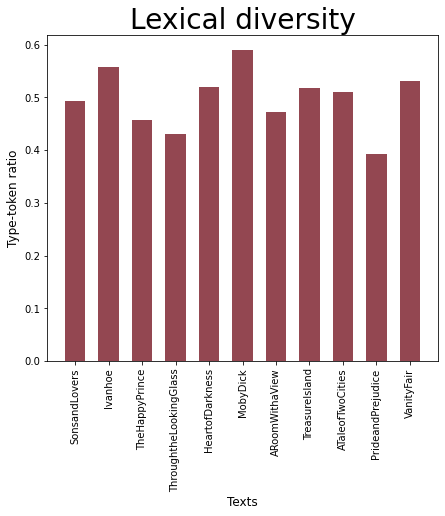

In [4]:
%matplotlib inline


x_axis = list(ttr_scores.keys())
y_axis = list(ttr_scores.values())

import matplotlib.pyplot as plt
import pandas as pd


fig = plt.figure( figsize=( 7 ,6 ) )
ax = plt.axes()


bar_width = 0.6
opacity = 0.8

ax.bar( x_axis , y_axis , width = bar_width, alpha = opacity , color = '#781926')

plt.xticks(rotation= 90)

ax.set_xlabel('Texts' , fontsize= 12)
ax.set_ylabel('Type-token ratio' , fontsize = 12 )
ax.set_title( 'Lexical diversity' , fontsize=28 )


plt.show()